In [163]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as D
import torch.backends.cudnn as cudnn
import numpy as np


In [376]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
print(transform)
trainset = torchvision.datasets.CIFAR10(root="data", train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                           shuffle=True, num_workers=16)
testset = torchvision.datasets.CIFAR10(root="data", train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                       shuffle=False, num_workers=16)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck", )


Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Files already downloaded and verified
Files already downloaded and verified


truck truck horse cat


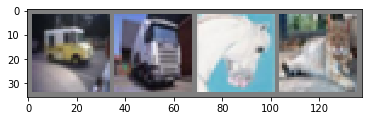

In [377]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(" ".join(classes[labels[j]] for j in range(4)))

In [378]:
import torch.nn as nn
import torch.nn.functional as F

In [379]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
device = torch.device("cuda:0")
cudnn.benchmark = True
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [380]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

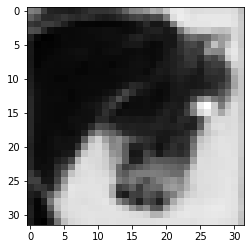

In [381]:
image_plt = images[2][0].numpy()
plt.imshow(image_plt, cmap="Greys", interpolation="nearest")
plt.show()

GroundTruth:    cat  ship  ship plane


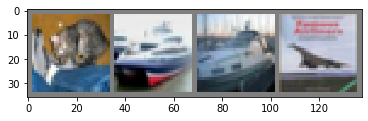

In [382]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [441]:
def progress(start, end, loss=0, e=0, epoch=0, suffix='Complete', length=25, fill='#'):
    percent = str("{:.1f}".format(100 * (start / float(end))))
    percent = percent.rjust(5, " ")
    filledLength = int(length * start // end)
    bar = fill * filledLength + '-' * (length - filledLength)
    fillzero = str(start)
    prog = "{}/{}".format(fillzero.rjust(len(str(end)), " "), end)
    prosecced = e / (start + 1e-10)
    estimate = (end - start) * prosecced
    if start == 0:
        print("\nEpoch: {}".format(epoch+1))
    if loss != 0:
        if start != end:
            print('\r{} [{}] {}% {} - loss: {:.4f} time: {}s ETA: {}s '.format(prog, bar, percent, suffix, loss, int(e), int(estimate)), end = '\r')
        else:
            print('\r{} [{}] {}% {} - loss: {:.4f} time: {}s　　　　　　'.format(prog, bar, percent, suffix, loss, int(e)), end="\r")
    else:
        pass
        # print('\r{} [{}] {}% {} - loss: {:.3f} time: {:.3f}s'.format(prog, bar, percent, suffix, loss, estimate), end = '\r')

    # Print New Line on Complete
    if start == end: 
        print()

In [444]:
for epoch in range(2):  # すべてのデータを2回学習(epochs=2)

    running_loss = 0.0
    running_tloss = 0.0
    estimate = time.time()
    progress(0, len(trainloader), 0, estimate, epoch)
    for i, (data, tdata) in enumerate(zip(trainloader, testloader)):
        # get the inputs
        inputs, labels = data
        tinputs, tlabels = tdata
#         vinputs, vlabels = 

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(0))
        toutputs = net(tinputs.to(0))
        
        loss = criterion(outputs, labels.to(0))
        tloss = criterion(toutputs, tlabels.to(0))
        loss.backward()
        tloss.backward()
        
        optimizer.step()

        estimate2 = time.time() - estimate
        progress(i+1, len(trainloader), running_loss/(i+1), estimate2)

#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0


Epoch: 1

Epoch: 2


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car  ship


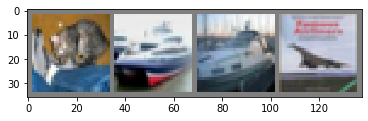

In [445]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
outputs = net(images.to(0))
_, predicted = torch.max(outputs, 1)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(4)))

In [446]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(0))
        _, predicted = torch.max(outputs.data, 1)
        total+=labels.to(0).size(0)
        correct += (predicted ==labels.to(0)).sum().item()
print("Accuracy of the network on the 10000 test images: %d %%" % (100*correct/total))


Accuracy of the network on the 10000 test images: 62 %


In [453]:
loss = 2.11231
lambdad = torch.tensor(1.)
l2_reg = torch.tensor(0.)
for param in model.parameters():
    l2_reg += torch.norm(param)
loss += lambdad * l2_reg
loss

tensor(2462.7954, grad_fn=<AddBackward0>)

In [472]:
def t(*args, **kwargs):
    print(args[0])
    print(kwargs)
    

In [473]:
t(3, 3, 4)

3
{}
